In [1]:
# Imports and data loading 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelBinarizer


feature_names = ['Alcohol',
                 'Malic acid',
                 'Ash',
                 'Alcalinity of ash',
                 'Magnesium',
                 'Total phenols',
                 'Flavanoids',
                 'Nonflavanoid phenols',
                 'Proanthocyanins',
                 'Color intensity',
                 'Hue',
                 'OD280/OD315 of diluted wines',
                 'Proline']
class_names = ['1','2','3']

data = pd.read_csv('../input/wine.data', names=feature_names)
target = data.index.values

### Read the manual
>In a classification context, this is a well posed problem 
   with "well behaved" class structures. A good data set 
   for first testing of a new classifier, but not very 
   challenging.

This suggests that OOB models will get good results. 

>These data are the results of a chemical analysis of
      wines grown in the same region in Italy but derived from three
      different cultivars.
      The analysis determined the quantities of 13 constituents
      found in each of the three types of wines. 

There are three classes and 13 features. 

>1) Alcohol  
 	2) Malic acid  
 	3) Ash  
	4) Alcalinity of ash    
 	5) Magnesium  
	6) Total phenols  
 	7) Flavanoids  
 	8) Nonflavanoid phenols  
 	9) Proanthocyanins  
	10) Color intensity  
	11) Hue  
	12) OD280/OD315 of diluted wines  
	13) Proline  

The names of the 13 predictive features.  

>5. Number of Instances  
    class 1 59  
    class 2 71  
    class 3 48  

Of the three classes, there are 59 instances of class 1, 71 instances of class 2, and 48 instances of class 3, for a total of 178 instances.

>6. Number of Attributes 
	13

Definitely 13 features. 

>All attributes are continuous

All the feature data are continuous. There are no categorical variables, besides the target. 

>8. Missing Attribute Values:
	None

There is no missing data, so no need to worry about that. 

The most important thing to note here is the very small amout of data, both absolutely (178 is not many) and relatively (178:13 is close to being a 13:1 ratio, which is only one order of magnitude difference). In this case, the curse of dimensionality may come into play very strongly. 

In [2]:
# Lets take a look at a random sample of the data: 
data.sample(5, random_state=4)

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
3,12.96,3.45,2.35,18.5,106,1.39,0.70,0.40,0.94,5.28,0.68,1.75,675
3,13.52,3.17,2.72,23.5,97,1.55,0.52,0.50,0.55,4.35,0.89,2.06,520
1,14.38,1.87,2.38,12.0,102,3.30,3.64,0.29,2.96,7.50,1.20,3.00,1547
1,14.21,4.04,2.44,18.9,111,2.85,2.65,0.30,1.25,5.24,0.87,3.33,1080
2,12.72,1.81,2.20,18.8,86,2.20,2.53,0.26,1.77,3.90,1.16,3.14,714


All data appears numeric as was stated. There are meaningful differences in magnitude (0.55 for Proanthocyanins and 1547 for Proline), so standardisation will be required for several of the models. 

The target variable is a qualitiative nominal variable, so regression is not suitable. This will be a classification problem. 

In [3]:
# Descriptive statistics
data.describe()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


There are definitely 178 instances of each feature. Looking at the numbers, several have means that are not half way betwen their min and max values, or close to their 50th percentile, so that will need to be looked into. 

Descriptive statistics - target variable: 
Count: 178
Mean: 1.94
Min/Max: (1, 3)


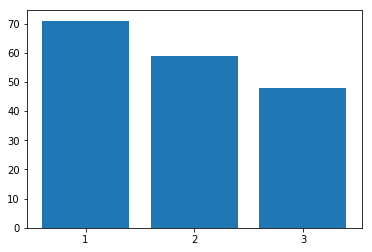

In [4]:
# Look at the target variable
target_counts = data.index.value_counts()

target_desc = stats.describe(target)
print('''Descriptive statistics - target variable: 
Count: {}
Mean: {}
Min/Max: {}'''
      .format(target_desc.nobs,
              '%.2f' % target_desc.mean,
              target_desc.minmax))

fig_1, ax_1 = plt.subplots()
ax_1.bar([1,2,3],target_counts);
ax_1.xaxis.set(ticks=np.arange(1,4), ticklabels=class_names);

There is clearly some imbalance between classes, but it is not so great as to cause problems. 

/home/chhk/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


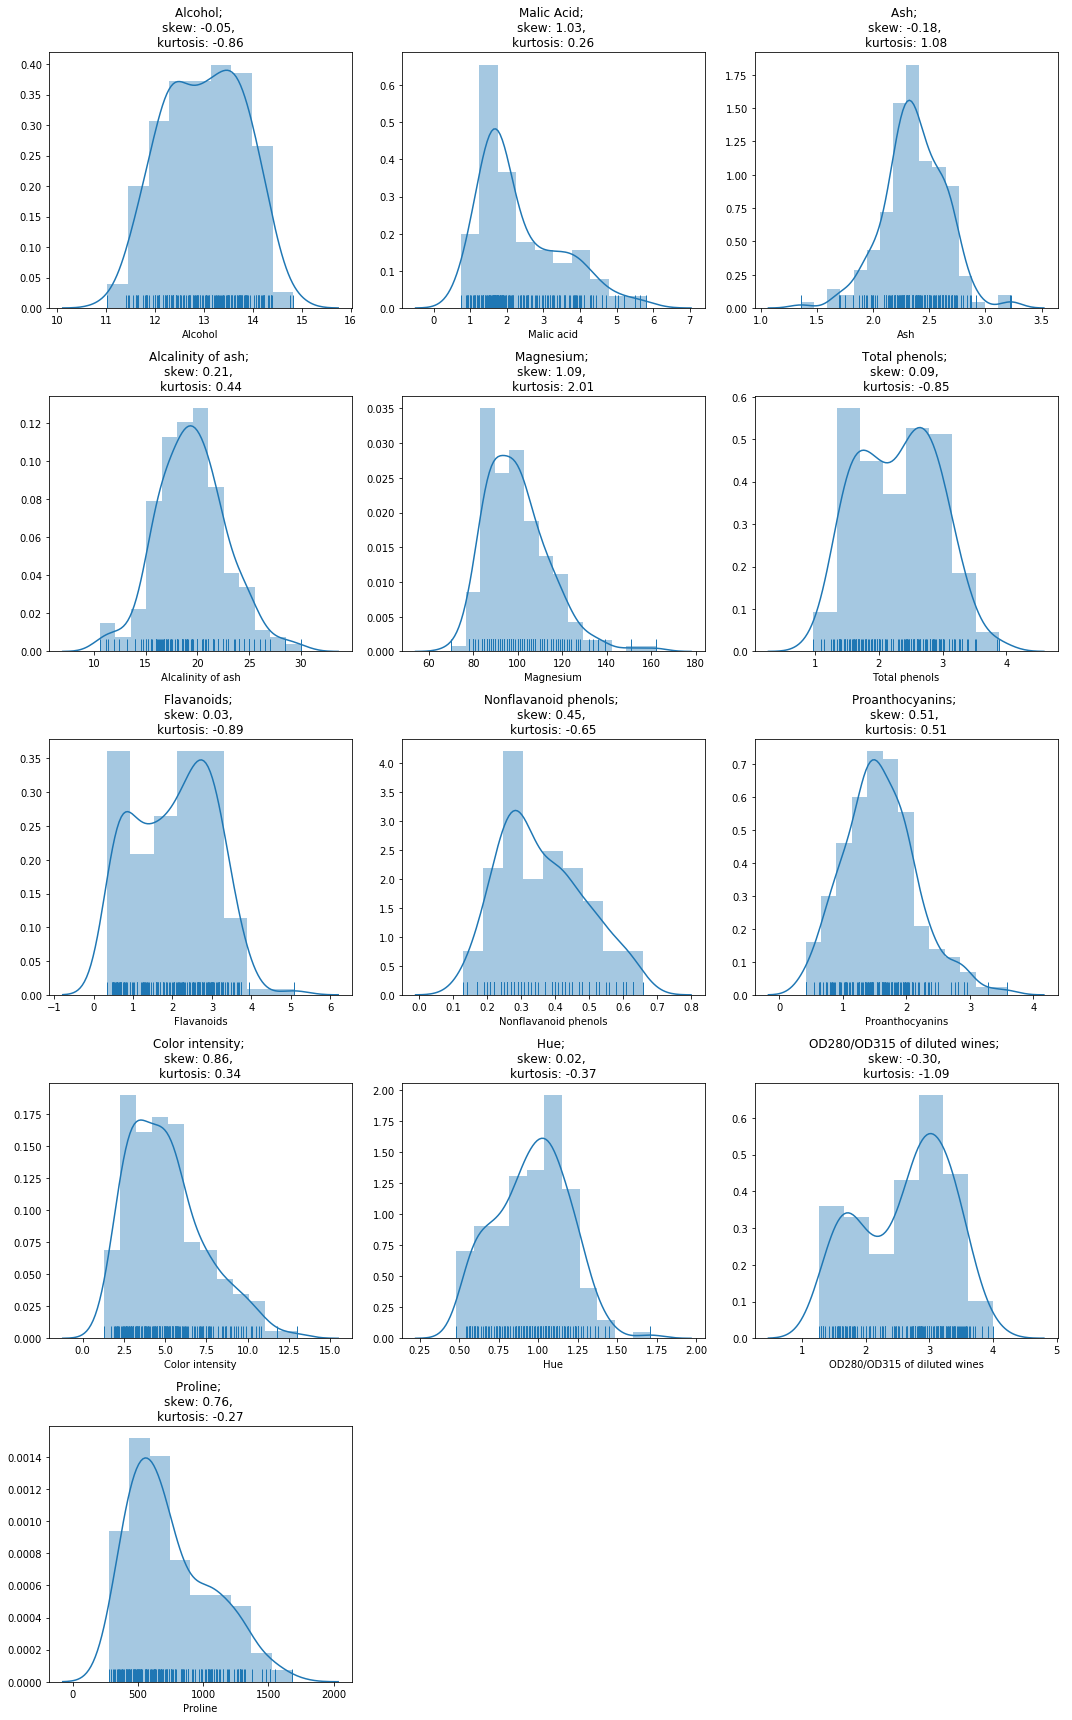

In [5]:
# Look at the feature variables
fig_2, ax_2 = plt.subplots(5,3,figsize=(15,24))
ax_2[-1, -1].axis('off');
ax_2[-1, -2].axis('off');

alcohol_stats = stats.describe(data['Alcohol']);
malic_acid_stats = stats.describe(data['Malic acid']);
ash_stats = stats.describe(data['Ash']);
alcalinity_of_ash_stats = stats.describe(data['Alcalinity of ash']);
magnesium_stats = stats.describe(data['Magnesium']);
total_phenols_stats = stats.describe(data['Total phenols']);
flavanoids_stats = stats.describe(data['Flavanoids']);
nonflavanoid_phenols_stats = stats.describe(data['Nonflavanoid phenols']);
proanthocyanins_stats = stats.describe(data['Proanthocyanins']);
color_intensity_stats = stats.describe(data['Color intensity']);
hue_stats = stats.describe(data['Hue']);
od1280_od315_of_diluted_wines_stats = stats.describe(data['OD280/OD315 of diluted wines']);
proline_stats = stats.describe(data['Proline']);

sns.distplot(a=data['Alcohol'], hist=True, kde=True, rug=True, ax=ax_2[0][0]).set_title('Alcohol; \nskew: {}, \nkurtosis: {}'.format('%.2f' % alcohol_stats.skewness, '%.2f' % alcohol_stats.kurtosis))
sns.distplot(a=data['Malic acid'], hist=True, kde=True, rug=True, ax=ax_2[0][1]).set_title('Malic Acid; \nskew: {}, \nkurtosis: {}'.format('%.2f' % malic_acid_stats.skewness, '%.2f' % malic_acid_stats.kurtosis))
sns.distplot(a=data['Ash'], hist=True, kde=True, rug=True, ax=ax_2[0][2]).set_title('Ash; \nskew: {}, \nkurtosis: {}'.format('%.2f' % ash_stats.skewness, '%.2f' % ash_stats.kurtosis))
sns.distplot(a=data['Alcalinity of ash'], hist=True, kde=True, rug=True, ax=ax_2[1][0]).set_title('Alcalinity of ash; \nskew: {}, \nkurtosis: {}'.format('%.2f' % alcalinity_of_ash_stats.skewness, '%.2f' % alcalinity_of_ash_stats.kurtosis))
sns.distplot(a=data['Magnesium'], hist=True, kde=True, rug=True, ax=ax_2[1][1]).set_title('Magnesium; \nskew: {}, \nkurtosis: {}'.format('%.2f' % magnesium_stats.skewness, '%.2f' % magnesium_stats.kurtosis))
sns.distplot(a=data['Total phenols'], hist=True, kde=True, rug=True, ax=ax_2[1][2]).set_title('Total phenols; \nskew: {}, \nkurtosis: {}'.format('%.2f' % total_phenols_stats.skewness, '%.2f' % total_phenols_stats.kurtosis))
sns.distplot(a=data['Flavanoids'], hist=True, kde=True, rug=True, ax=ax_2[2][0]).set_title('Flavanoids; \nskew: {}, \nkurtosis: {}'.format('%.2f' % flavanoids_stats.skewness, '%.2f' % flavanoids_stats.kurtosis))
sns.distplot(a=data['Nonflavanoid phenols'], hist=True, kde=True, rug=True, ax=ax_2[2][1]).set_title('Nonflavanoid phenols; \nskew: {}, \nkurtosis: {}'.format('%.2f' % nonflavanoid_phenols_stats.skewness, '%.2f' % nonflavanoid_phenols_stats.kurtosis))
sns.distplot(a=data['Proanthocyanins'], hist=True, kde=True, rug=True, ax=ax_2[2][2]).set_title('Proanthocyanins; \nskew: {}, \nkurtosis: {}'.format('%.2f' % proanthocyanins_stats.skewness, '%.2f' % proanthocyanins_stats.kurtosis))
sns.distplot(a=data['Color intensity'], hist=True, kde=True, rug=True, ax=ax_2[3][0]).set_title('Color intensity; \nskew: {}, \nkurtosis: {}'.format('%.2f' % color_intensity_stats.skewness, '%.2f' % color_intensity_stats.kurtosis))
sns.distplot(a=data['Hue'], hist=True, kde=True, rug=True, ax=ax_2[3][1]).set_title('Hue; \nskew: {}, \nkurtosis: {}'.format('%.2f' % hue_stats.skewness, '%.2f' % hue_stats.kurtosis))
sns.distplot(a=data['OD280/OD315 of diluted wines'], hist=True, kde=True, rug=True, ax=ax_2[3][2]).set_title('OD280/OD315 of diluted wines; \nskew: {}, \nkurtosis: {}'.format('%.2f' % od1280_od315_of_diluted_wines_stats.skewness, '%.2f' % od1280_od315_of_diluted_wines_stats.kurtosis))
sns.distplot(a=data['Proline'], hist=True, kde=True, rug=True, ax=ax_2[4][0]).set_title('Proline; \nskew: {}, \nkurtosis: {}'.format('%.2f' % proline_stats.skewness, '%.2f' % proline_stats.kurtosis))

plt.tight_layout()

Only Magnesium has skewness or kurtosis over common limits (both, in fact) , though only barely. I won't do anything specific for skew or kurtosis. Standardisation as per normal will be applied. 

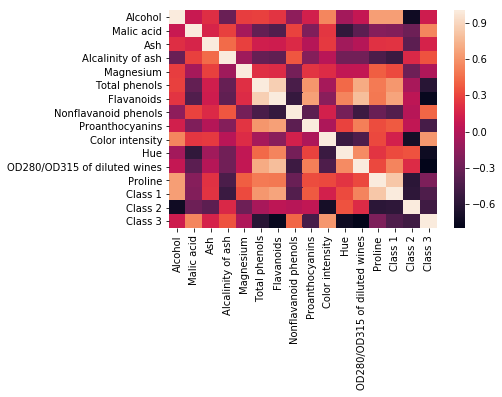

In [15]:
# Correlation heatmap
data_and_target = data.copy(deep=True)

lb = LabelBinarizer()
lb.fit(target)
target_binarized = lb.transform(target)

data_and_target['Class 1'] = target_binarized[:,0]
data_and_target['Class 2'] = target_binarized[:,1]
data_and_target['Class 3'] = target_binarized[:,2]

sns.heatmap(data_and_target.corr());

I binarized the target variable in order to prevent the correlation algorithm from considering the target to be ordinal data, and instead force it to be processed as nominal data. 

This heatmap shows some serious correlation between certain feature variables and the target variable.  
Among the most strongly correlated (per class) are: 
- Class 1: Nonflavanoid phenols, and Proline
- Class 2: Alcohol, Color intensity, and Proline
- Class 3: Flavanoids, Hue, and OD280/OD315 of diluted wine

That said, it is interpreting the correlation from the colour chart is a little inspecific, so let's get some numbers for that: 

In [34]:
data_and_target.corr().loc['Alcohol':'Proline','Class 1':'Class 3']

,Class 1,Class 2,Class 3
Alcohol,0.647232,-0.726383,0.114941
Malic acid,-0.205847,-0.295175,0.544042
Ash,0.229268,-0.362457,0.156738
Alcalinity of ash,-0.519646,0.181764,0.350650
Magnesium,0.326171,-0.296972,-0.018306
Total phenols,0.614960,-0.047301,-0.600119
Flavanoids,0.673770,0.042179,-0.761232
Nonflavanoid phenols,-0.407680,0.011868,0.419347
Proanthocyanins,0.380500,0.056208,-0.465629
Color intensity,0.143221,-0.694679,0.614582


Judging by the discreteness of all these correlations, it looks like most (if not all) classifiers _should_ get excellent performance, even with the very low data:features ratio. 

Let's check for outliers and make sure there's nothing untoward going on here. 

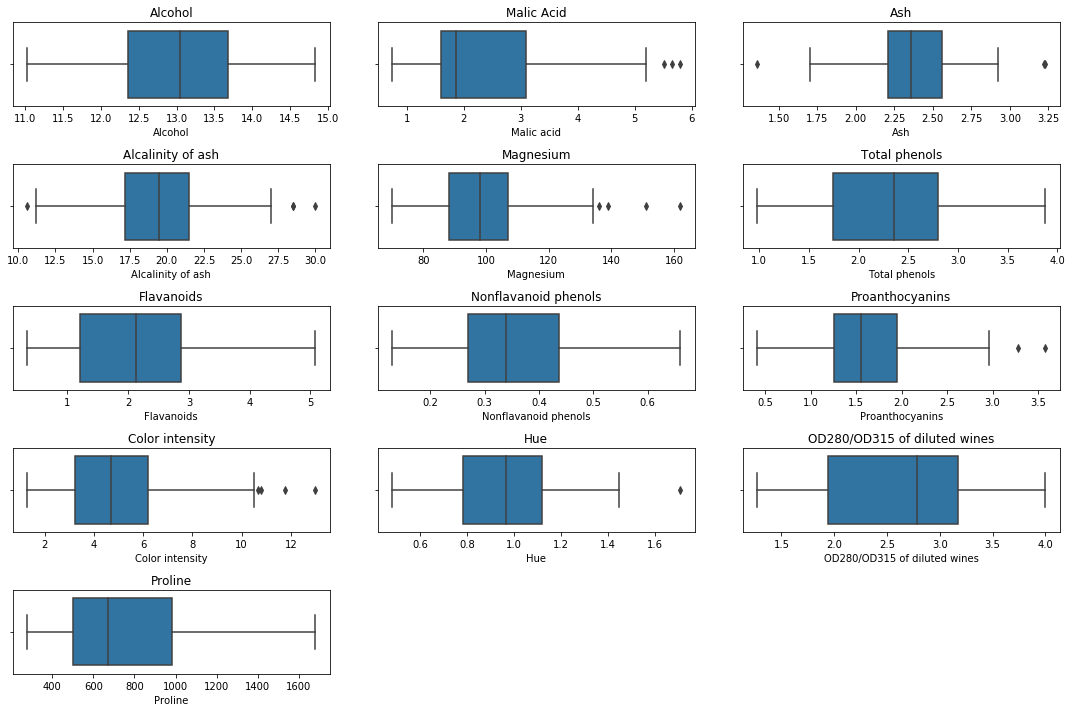

In [43]:
fig_3, ax_3 = plt.subplots(5,3,figsize=(15,10))
ax_3[-1, -1].axis('off');
ax_3[-1, -2].axis('off');

# sns.boxplot(x="alive",y="age",hue="adult_male",data=titanic)

sns.boxplot(x=data['Alcohol'], ax=ax_3[0][0]).set_title('Alcohol');
sns.boxplot(x=data['Malic acid'], ax=ax_3[0][1]).set_title('Malic Acid');
sns.boxplot(x=data['Ash'], ax=ax_3[0][2]).set_title('Ash');
sns.boxplot(x=data['Alcalinity of ash'], ax=ax_3[1][0]).set_title('Alcalinity of ash');
sns.boxplot(x=data['Magnesium'], ax=ax_3[1][1]).set_title('Magnesium');
sns.boxplot(x=data['Total phenols'], ax=ax_3[1][2]).set_title('Total phenols');
sns.boxplot(x=data['Flavanoids'], ax=ax_3[2][0]).set_title('Flavanoids');
sns.boxplot(x=data['Nonflavanoid phenols'], ax=ax_3[2][1]).set_title('Nonflavanoid phenols');
sns.boxplot(x=data['Proanthocyanins'], ax=ax_3[2][2]).set_title('Proanthocyanins');
sns.boxplot(x=data['Color intensity'], ax=ax_3[3][0]).set_title('Color intensity');
sns.boxplot(x=data['Hue'], ax=ax_3[3][1]).set_title('Hue');
sns.boxplot(x=data['OD280/OD315 of diluted wines'], ax=ax_3[3][2]).set_title('OD280/OD315 of diluted wines');
sns.boxplot(x=data['Proline'], ax=ax_3[4][0]).set_title('Proline');

fig_3.tight_layout()

Seven of the features have outlier data. It could be interesting to see how removing them affects performance, on both non-outlier and outlier test data. 

### questions that need answers
0. RTFM
1. what type of data is it? 
2. how much of it is there? 
3. what does it look like? 
4. target variable: datatype? descriptive statistics? unbalanced? does it need weighting? what sorts of models can predict this? 
5. feature data: independent or dependent?
6. feature data: what are the descriptive statistics of the data? 
7. feature data: is it sparse or dense? 
8. feature data: how much of it is missing/zero? 
9. feature data: what does it look like when graphed? 
10. feature data: are there outliers? 
11. feature data: are there anomalous patterns? 
12. feature data: what correlations are present between variables? 
13. feature data: is there correlation between features that is worth remarking on? 
14. feature data: should some be left out?
15. feature data: should some be engineered? 
16. feature data: did the engineering work? what did it do? 